# (Already Filtered and Normalised) ScanPy Analysis

Here we use the filtered matrices from Seurat

In [1]:
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.19.1 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.8.1


In [3]:
ecs_norm = sc.read_csv("files/4_extract/ecs.scaled.tsv", delimiter="\t")
mcs_norm = sc.read_csv("files/4_extract/mcs.scaled.tsv", delimiter="\t")

In [4]:
print(ecs_norm); print(mcs_norm)

AnnData object with n_obs × n_vars = 711 × 788
AnnData object with n_obs × n_vars = 589 × 789


It actually looks like the objects have the same dimensions as the unscaled datasets...

normalizing counts per cell
    finished (0:00:00)


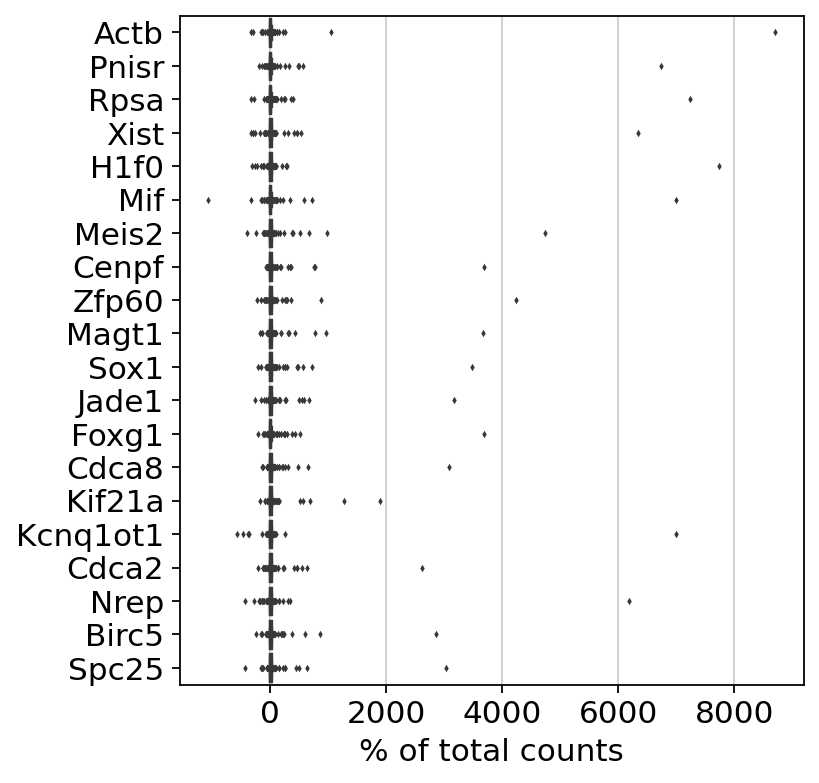

normalizing counts per cell
    finished (0:00:00)


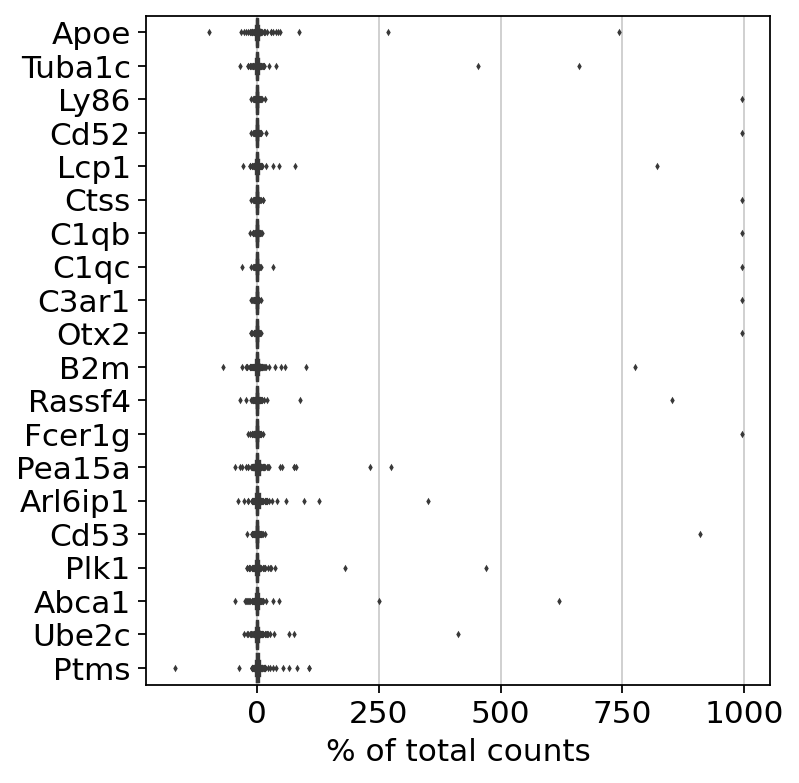

In [5]:
sc.pl.highest_expr_genes(ecs_norm, n_top=20)
sc.pl.highest_expr_genes(mcs_norm, n_top=20)

Okay, so the datasets are already scaled and normalised.

Now we need to extract the highly variable genes, but how do we do this since the matrices are already scaled? The Seurat objects did not have any data in the `@meta.feature` slot, suggesting the highly variable genes were not selected.

### How to proceed?

We actually cannot here, since we do not have any means to select highly variable genes except for those with high stdevs.

On another note, we actually *shouldn't* proceed with already filtered and normalised matrices since we would not actually be recapitulating the same  clusters with ScanPy, but would be relying on prior analysis from Seurat which would throw question to the robustness of the clustering if it cannot be independently discovered across pipelines.